In [1]:
!pip install pyforest
import pyforest

In [2]:
df = pd.read_csv('/content/heights.csv')
df.head()

<IPython.core.display.Javascript object>

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1


In [3]:
# percentile method

# Detect Outlier

max_threshold = df['height'].quantile(0.95)
max_threshold

7.4799999999999995

In [4]:
df[df['height'] > max_threshold]

,name,height
11,ramesh,8.0


In [5]:
min_threshold = df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [6]:
df[df['height'] < min_threshold]

,name,height
7,anil,1.2


In [7]:
# remove outliers

df[(df['height'] < max_threshold) & (df['height'] > min_threshold)]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


In [8]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

<IPython.core.display.Javascript object>

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.shape

(13320, 9)

In [10]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [11]:
df = df.drop('area_type', axis = 1)
df.shape

(13320, 8)

In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
min_threshold, max_threshold = df['price'].quantile([0.001,0.999])
min_threshold, max_threshold

(11.159500000000001, 2000.0)

In [14]:
df[df['price'] < min_threshold]

,availability,location,size,society,total_sqft,bath,balcony,price
171,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
942,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
1471,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2437,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
4113,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
5410,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
7482,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00
8594,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
8653,Ready To Move,Doddaballapur,2 Bedroom,NaN,640,1.0,0.0,10.50
10526,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00


In [15]:
df[df['price'] > max_threshold]

,availability,location,size,society,total_sqft,bath,balcony,price
408,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
605,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.0
2623,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.0
3180,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0
4162,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.0
6421,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.0
10304,Ready To Move,5th Block Jayanagar,4 Bedroom,NaN,10624,4.0,2.0,2340.0
11080,18-Jan,Ashok Nagar,4 BHK,NaN,8321,5.0,2.0,2912.0
11763,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.0
12443,Ready To Move,Dollars Colony,4 Bedroom,NaN,4350,8.0,NaN,2600.0


In [16]:
# Remove Outliers

df_new = df[(df['price'] < max_threshold) & (df['price'] > min_threshold)]

In [17]:
df_new.shape

(13291, 8)

In [18]:
df_new.describe()

,bath,balcony,price
count,13219.000000,12688.000000,13291.000000
mean,2.690673,1.584253,110.010361
std,1.335757,0.817169,125.434347
min,1.000000,0.000000,11.500000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,1950.000000


<IPython.core.display.Javascript object>

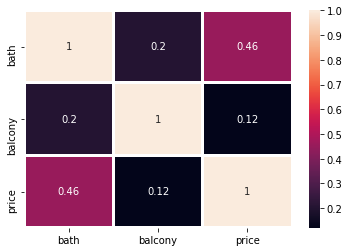

In [22]:
sns.heatmap(df.corr(), linewidths = 2, annot = True)

In [23]:
# Z score
# used for outliers detection
# how far the outlier is
# based on standard deviation - data dispersion along with the mean value

df = pd.read_csv('/content/heights.csv')
df.head()

<IPython.core.display.Javascript object>

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1


In [24]:
df['zscore'] = (df['height'] - df['height'].mean())/df['height'].std()

In [25]:
df

,name,height,zscore
0,mohit,5.3,-0.238392
1,sakshi,5.2,-0.301363
2,arun,5.1,-0.364335
3,varun,4.9,-0.490278
4,ani,7.1,0.895094
5,amit,6.4,0.454294
6,amita,6.5,0.517265
7,anil,1.2,-2.820220
8,sudha,6.0,0.202408
9,ram,5.1,-0.364335
